## Introduction

I have compiled this cheat sheet for myself to help analyse time series specific data (including forecasting). I will continually add to this notebook as I learn more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("Time_Series_Data_Example.xlsx", index_col='Date', parse_dates=True)
df.head()

,Value
Date,
2018-01-01,20
2018-01-02,21
2018-01-03,22
2018-01-04,23
2018-01-05,24


Filtering based on periods of time and finding a distinct value

In [2]:
# Find the minimum value in the period

df.loc['2018-01-01':'2018-03-01']['Value'].min()

14

In [3]:
# Find the maximum value in the period

df.loc['2018-01-01':'2018-03-01']['Value'].max()

40

In [4]:
# % Increase/Decrease calculation

(df.loc['2019-01-01':'2019-12-31']['Value'].sum() / df.loc['2018-01-01':'2018-12-31']['Value'].sum()) -1 

0.2765312632922161

## Time Series - Resampling Alias list



- B: business day frequency
- D: calendar day frequency
- W: weekly frequency
- M: month end frequency
- SM: semi-month end frequency (15th and end of month)
- BM: business month end frequency
- MS: month start frequency
- BMS: business month start frequency
- Q: quarter end frequency

- A: year end frequency
- BA: business year end frequency
- AS: year start frequency
- BAS: business year start frequency
- BH: business hour frequency
- H: hourly frequency
- T, min: minutely frequency
- S: secondly frequency
- L, ms: milliseconds
- U, us: microseconds
- N: nanoseconds

Resampling allows you to filter the datetime index into a specific interval. You can then apply an aggregation function on it to summarise the data at specific periods

In [5]:
# A = Year
df.resample(rule='A').sum()


,Value
Date,
2018-12-31,18808
2019-12-31,24009


In [6]:
# M = Month
df.resample("M").sum()

,Value
Date,
2018-01-31,975
2018-02-28,590
2018-03-31,1302
2018-04-30,1623
2018-05-31,1587
2018-06-30,2014
2018-07-31,1600
2018-08-31,1664
2018-09-30,1301


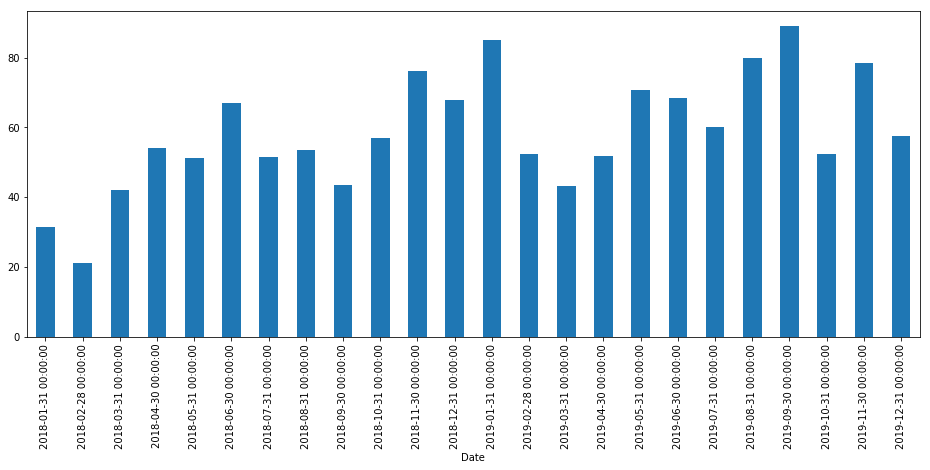

In [7]:
# Plot the mean over time 

df['Value'].resample('M').mean().plot.bar(figsize=(16,6))

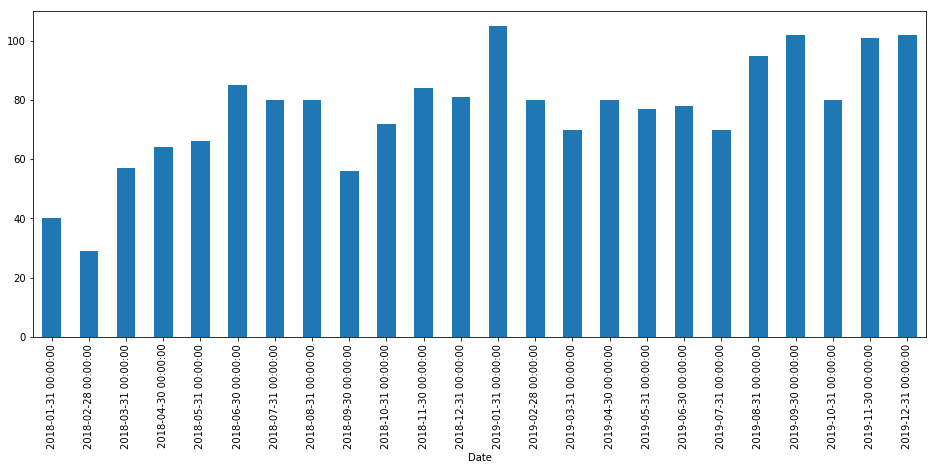

In [8]:
# Plot the max over time

df['Value'].resample('M').max().plot.bar(figsize=(16,6))

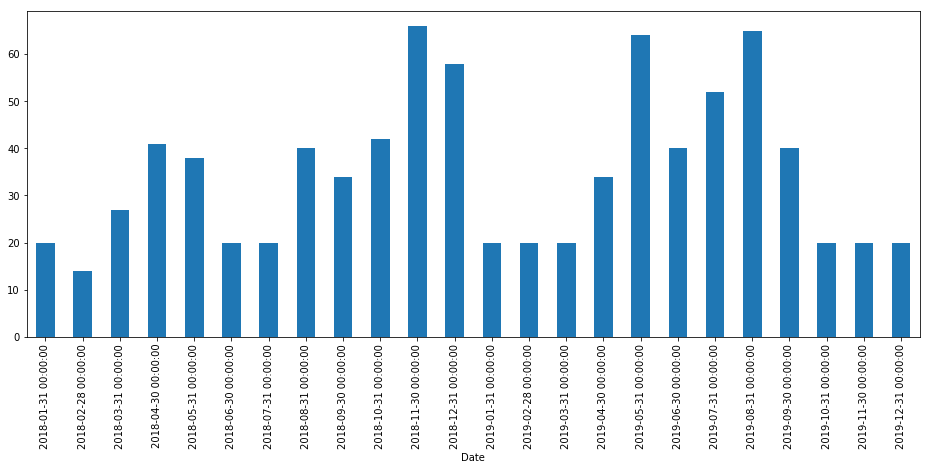

In [9]:
# Plot the min over time

df['Value'].resample('M').min().plot.bar(figsize=(16,6))

In [10]:
from datetime import datetime
datetime(2020, 1, 2, 12, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Thursday, January 02, 2020  12:05:06 PM'

## Shifting

Shifting allows you to take different snap shots by moving (shifting) the timeframes. You can then hold a different time period in a variable and compare it with a different timeframe.

In [11]:
df.shift(1).head()

,Value
Date,
2018-01-01,NaN
2018-01-02,20.0
2018-01-03,21.0
2018-01-04,22.0
2018-01-05,23.0


In [12]:
df.shift(1).tail()

,Value
Date,
2019-12-27,50.0
2019-12-28,40.0
2019-12-29,20.0
2019-12-30,30.0
2019-12-31,40.0


In [13]:
df.shift(-1).head()

,Value
Date,
2018-01-01,21.0
2018-01-02,22.0
2018-01-03,23.0
2018-01-04,24.0
2018-01-05,25.0


In [14]:
df.shift(-1).tail()

,Value
Date,
2019-12-27,20.0
2019-12-28,30.0
2019-12-29,40.0
2019-12-30,50.0
2019-12-31,NaN


In [15]:
# Shift index values up or down without realigning the data by passing in a freq argument.

df.shift(periods=1, freq='M').head()

,Value
Date,
2018-01-31,20
2018-01-31,21
2018-01-31,22
2018-01-31,23
2018-01-31,24


In [16]:
# See the month on month change with shift

monthly_data = df.resample("M").sum()
monthly_data_shift = monthly_data.shift(1)
change = monthly_data - monthly_data_shift
change["Value"]

Date
2018-01-31       NaN
2018-02-28    -385.0
2018-03-31     712.0
2018-04-30     321.0
2018-05-31     -36.0
2018-06-30     427.0
2018-07-31    -414.0
2018-08-31      64.0
2018-09-30    -363.0
2018-10-31     466.0
2018-11-30     516.0
2018-12-31    -181.0
2019-01-31     532.0
2019-02-28   -1164.0
2019-03-31    -127.0
2019-04-30     209.0
2019-05-31     641.0
2019-06-30    -141.0
2019-07-31    -191.0
2019-08-31     619.0
2019-09-30     193.0
2019-10-31   -1053.0
2019-11-30     731.0
2019-12-31    -571.0
Freq: M, Name: Value, dtype: float64

## Rolling Mean

Divide the data into "windows" of time, and then calculate an aggregate function for each window. This creates a simple moving average

In [17]:
df["rolling"] = df.rolling(window=7).mean()

df.head(15)

,Value,rolling
Date,,
2018-01-01,20,NaN
2018-01-02,21,NaN
2018-01-03,22,NaN
2018-01-04,23,NaN
2018-01-05,24,NaN
2018-01-06,25,NaN
2018-01-07,26,23.0
2018-01-08,27,24.0
2018-01-09,28,25.0


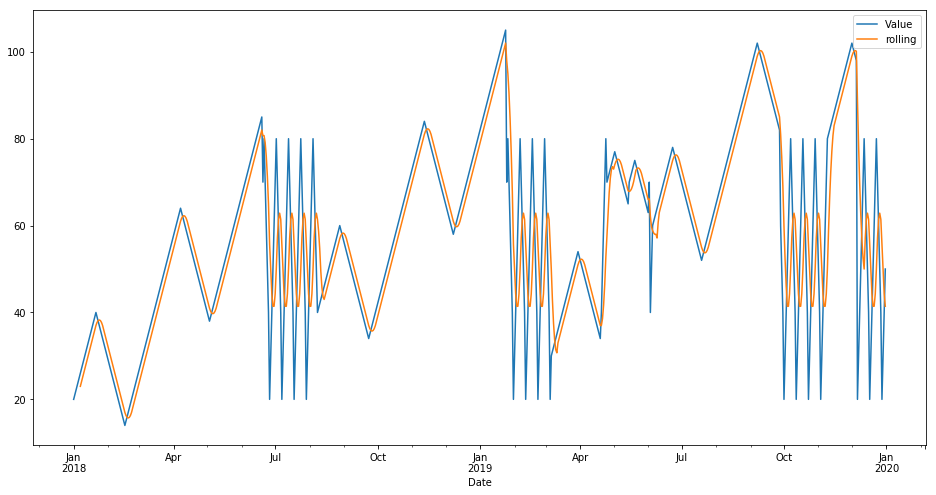

In [18]:
df[['Value','rolling']].plot(figsize=(16,8)).autoscale(axis='x',tight=False)

### Date Formatting

 

- %Y: Year with century as a decimal number.
- %y: Year without century as a zero-padded decimal number.
- %m: Month as a zero-padded decimal number.
- %B: Month as locale’s full name.
- %b: Month as locale’s abbreviated name.
- %d: Day of the month as a zero-padded decimal number.  
- %A: Weekday as locale’s full name.
- %a: Weekday as locale’s abbreviated name.
- %H: Hour (24-hour clock) as a zero-padded decimal number.
- %I: Hour (12-hour clock) as a zero-padded decimal number.
- %p: Locale’s equivalent of either AM or PM
- %M: Minute as a zero-padded decimal number
- %S: Second as a zero-padded decimal number
- %#m: Month as a decimal number. (Windows): 2
- %#x: Long date: 
- %#c: Long date and time: 
  

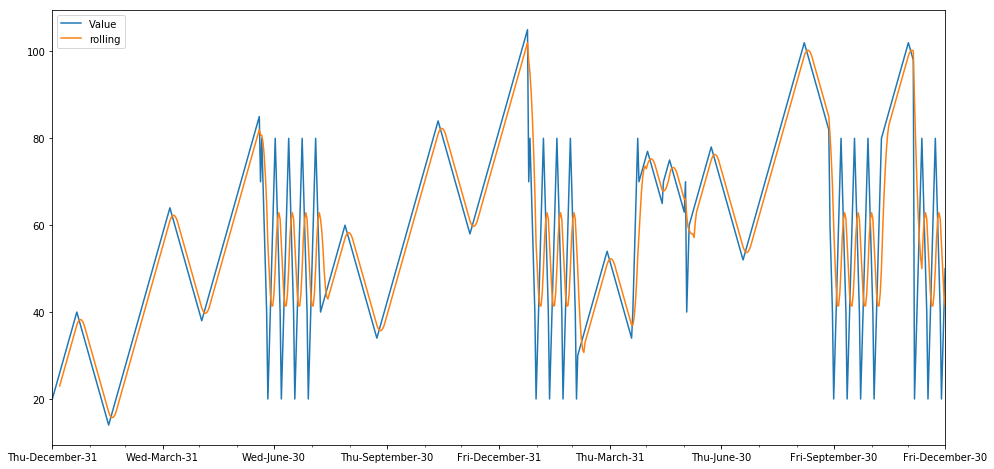

In [19]:
#Re-format the date axis

from matplotlib import dates

ax = df[['Value','rolling']].plot(figsize=(16,8))

# remove default label 
ax.set(xlabel='')

# and add new label
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Expanding

Expanding allows you to take into account everything from the start of the time series up to each point in time. Consider all prior data in the expanding set of averages.

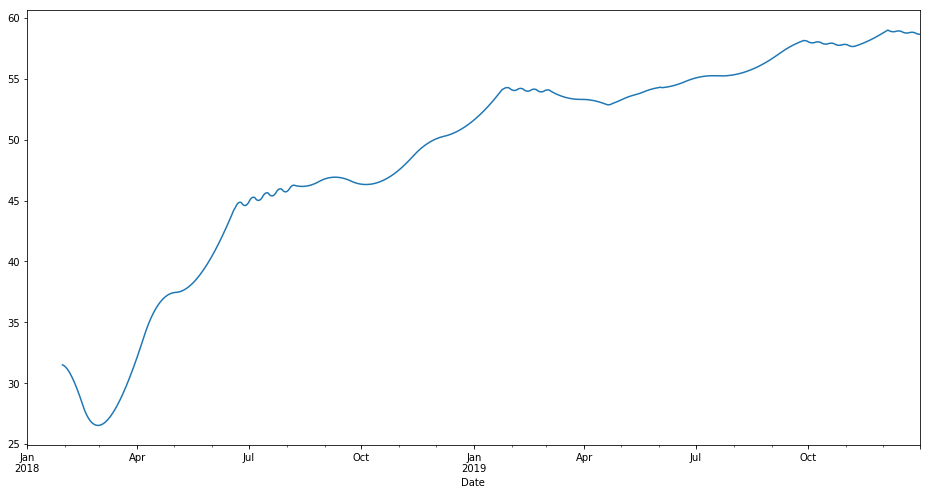

In [20]:
df['Value'].expanding(min_periods=30).mean().plot(figsize=(16,8));

## Decompositing a time series

Decompositing a time series is a statistical task that deconstructs a time series into several components, outlining patterns by category.

- Observed is actual
- Trend reflects the long-term progression of the series 
- Seasonal is a pattern that exists when a time series is influenced by seasonal factors
- Residual describes random, irregular influences

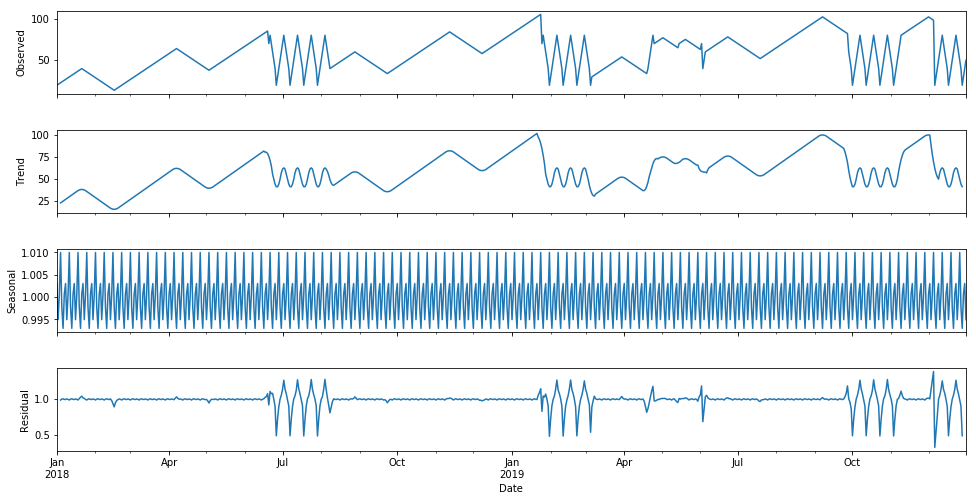

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Value'], model='multiplicative')
fig = result.plot()
fig.set_size_inches(15,8)


## Rolling Average (Simple Smoothing)

A rolling X Month period is the average of all the periods for the past X months. The X month time period shifts forward and the oldest month is no longer included in the calculation as a new month is added.

In [22]:
# 6 and 12 months are often used and therefore used here

df['6-month-SMA'] = df['Value'].rolling(window=6).mean()
df['12-month-SMA'] = df['Value'].rolling(window=12).mean()
df.head(15)

,Value,rolling,6-month-SMA,12-month-SMA
Date,,,,
2018-01-01,20,NaN,NaN,NaN
2018-01-02,21,NaN,NaN,NaN
2018-01-03,22,NaN,NaN,NaN
2018-01-04,23,NaN,NaN,NaN
2018-01-05,24,NaN,NaN,NaN
2018-01-06,25,NaN,22.5,NaN
2018-01-07,26,23.0,23.5,NaN
2018-01-08,27,24.0,24.5,NaN
2018-01-09,28,25.0,25.5,NaN


## EWMA
### Exponentially Weighted Moving Average

An EWMA introduces a smoothing parameter (when comparing with simple smoothing). Which means instead of equal weightings, the return is squared and weighted by a multiplier.

In [23]:
df['Exponentially Weighted Moving Average'] = df['Value'].ewm(span=12,adjust=False).mean()
df.head(15)

,Value,rolling,6-month-SMA,12-month-SMA,Exponentially Weighted Moving Average
Date,,,,,
2018-01-01,20,NaN,NaN,NaN,20.000000
2018-01-02,21,NaN,NaN,NaN,20.153846
2018-01-03,22,NaN,NaN,NaN,20.437870
2018-01-04,23,NaN,NaN,NaN,20.832044
2018-01-05,24,NaN,NaN,NaN,21.319422
2018-01-06,25,NaN,22.5,NaN,21.885664
2018-01-07,26,23.0,23.5,NaN,22.518639
2018-01-08,27,24.0,24.5,NaN,23.208079
2018-01-09,28,25.0,25.5,NaN,23.945298


## Double Exponential Smoothing
Double Exponential Smoothing adds a second smoothing factor which means the model can anticipate future increases or decreases where the level model would only work from recent calculations.

Be careful as these adjustment factors can become exaggerated over time (so therefore it needs to be "dampened").


In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['Double Exponential Smoothing'] = ExponentialSmoothing(df['Value'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Value,rolling,6-month-SMA,12-month-SMA,Exponentially Weighted Moving Average,Double Exponential Smoothing
Date,,,,,,
2018-01-01,20,NaN,NaN,NaN,20.000000,20.041152
2018-01-02,21,NaN,NaN,NaN,20.153846,21.041152
2018-01-03,22,NaN,NaN,NaN,20.437870,22.041152
2018-01-04,23,NaN,NaN,NaN,20.832044,23.041152
2018-01-05,24,NaN,NaN,NaN,21.319422,24.041152


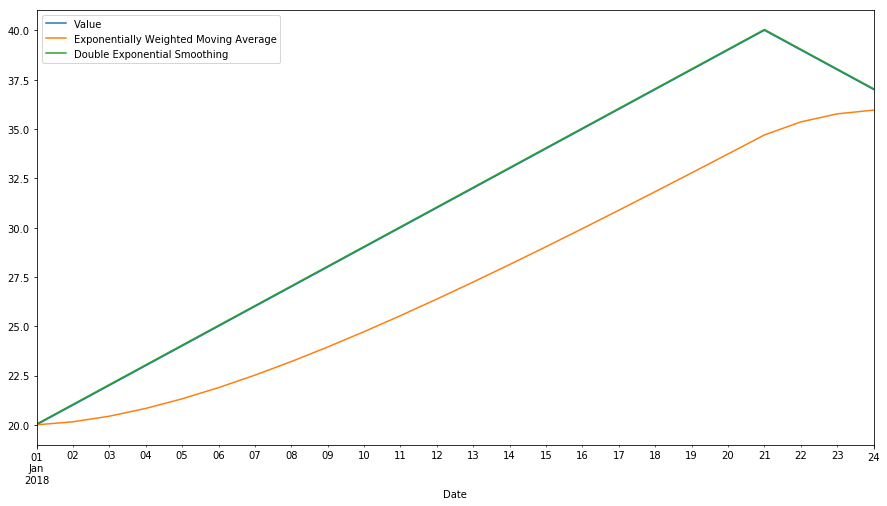

In [25]:
df[['Value','Exponentially Weighted Moving Average','Double Exponential Smoothing']].iloc[:24].plot(figsize=(15,8)).autoscale(axis='x',tight=True)

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


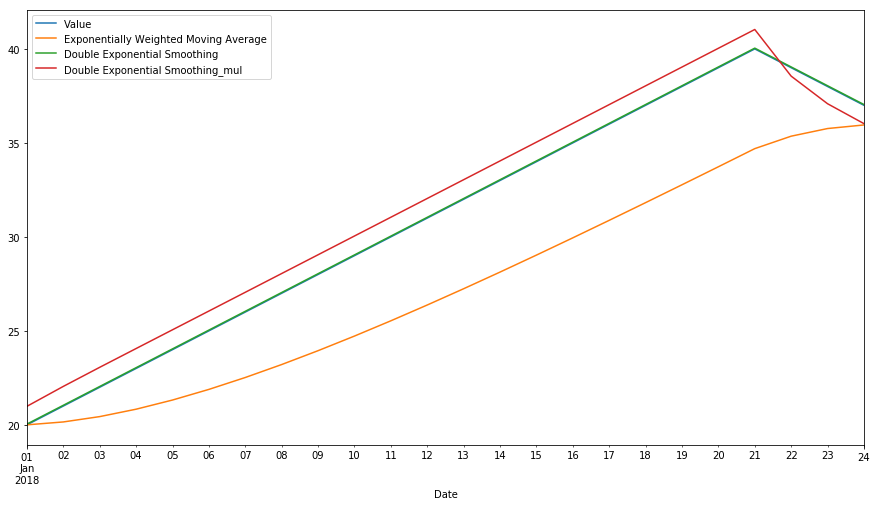

In [26]:
# Change the trend to 'mul'

df['Double Exponential Smoothing_mul'] = ExponentialSmoothing(df['Value'], trend='mul').fit().fittedvalues.shift(-1)
df[['Value',
    'Exponentially Weighted Moving Average',
    'Double Exponential Smoothing',
    'Double Exponential Smoothing_mul']].iloc[:24].plot(figsize=(15,8)).autoscale(axis='x',tight=True);

___
## Triple Exponential Smoothing
Adds a seasonal smoother to the Double Exponential Smoothing method


In [27]:
# df['EWMA12'] = df['Value'].ewm(span=12,adjust=False).mean()
# df['DESadd12'] = ExponentialSmoothing(df['Value'], trend='add').fit().fittedvalues.shift(-1)
df['Triple Exponential Smoothing'] = ExponentialSmoothing(df['Value'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Value,rolling,6-month-SMA,12-month-SMA,Exponentially Weighted Moving Average,Double Exponential Smoothing,Double Exponential Smoothing_mul,Triple Exponential Smoothing
Date,,,,,,,,
2018-01-01,20,NaN,NaN,NaN,20.000000,20.041152,20.985997,28.300952
2018-01-02,21,NaN,NaN,NaN,20.153846,21.041152,22.045943,21.235557
2018-01-03,22,NaN,NaN,NaN,20.437870,22.041152,23.061083,21.145982
2018-01-04,23,NaN,NaN,NaN,20.832044,23.041152,24.060209,22.704394
2018-01-05,24,NaN,NaN,NaN,21.319422,24.041152,25.057240,22.601021


In [28]:
df['Triple Exponential Smoothing_mul'] = ExponentialSmoothing(df['Value'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Value,rolling,6-month-SMA,12-month-SMA,Exponentially Weighted Moving Average,Double Exponential Smoothing,Double Exponential Smoothing_mul,Triple Exponential Smoothing,Triple Exponential Smoothing_mul
Date,,,,,,,,,
2018-01-01,20,NaN,NaN,NaN,20.000000,20.041152,20.985997,28.300952,18.333333
2018-01-02,21,NaN,NaN,NaN,20.153846,21.041152,22.045943,21.235557,18.894230
2018-01-03,22,NaN,NaN,NaN,20.437870,22.041152,23.061083,21.145982,19.788892
2018-01-04,23,NaN,NaN,NaN,20.832044,23.041152,24.060209,22.704394,20.776742
2018-01-05,24,NaN,NaN,NaN,21.319422,24.041152,25.057240,22.601021,21.792654


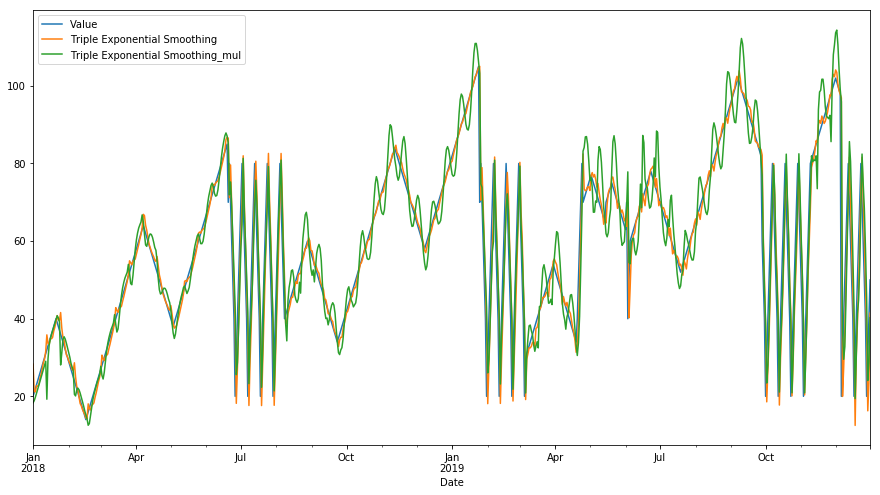

In [29]:
df[['Value',
    'Triple Exponential Smoothing',
    'Triple Exponential Smoothing_mul']].plot(figsize=(15,8)).autoscale(axis='x',tight=True)

# Forecasting

What really matters is actually trying to predict into the future. This section will focus on the methodologies available with Python.

#### Check to see if data is stationary

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print('reject null hypothesis - data has no unit root and is stationary')
    
    else:
        print('Fail to reject null hypothesis - data has no unit root, it is non-stationary')
        
        
        
adf_check(df['Value'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.924684946482604
p-value : 0.0018605062070854979
# of lags : 12
Num of Observations used : 717
reject null hypothesis - data has no unit root and is stationary


### Use Triple Exponential Smoothing

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


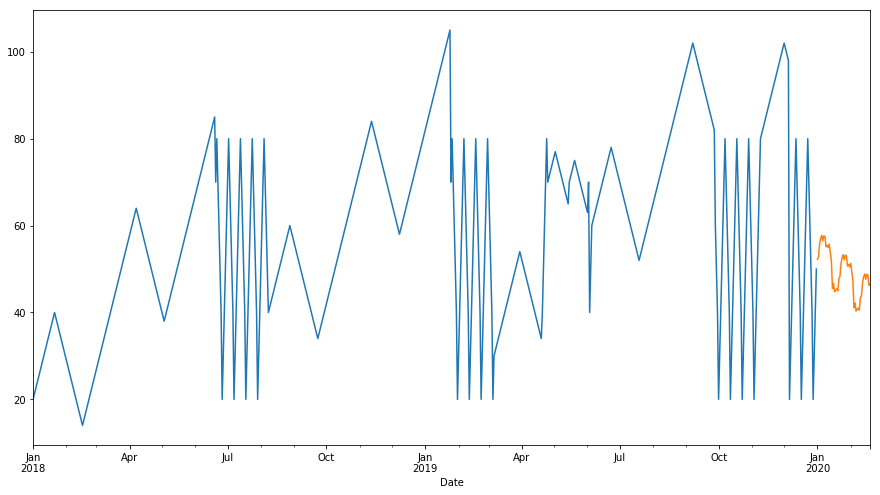

In [31]:
model = ExponentialSmoothing(df['Value'],trend='add',seasonal='add',seasonal_periods=20).fit()
forecast_predictions = model.forecast(50)
df['Value'].plot(figsize=(15,8))
forecast_predictions.plot()

## Autoregression Model

Forecast using a linear combination of past values of the variable. "Autoregression" is a regression of the variable against itself.

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


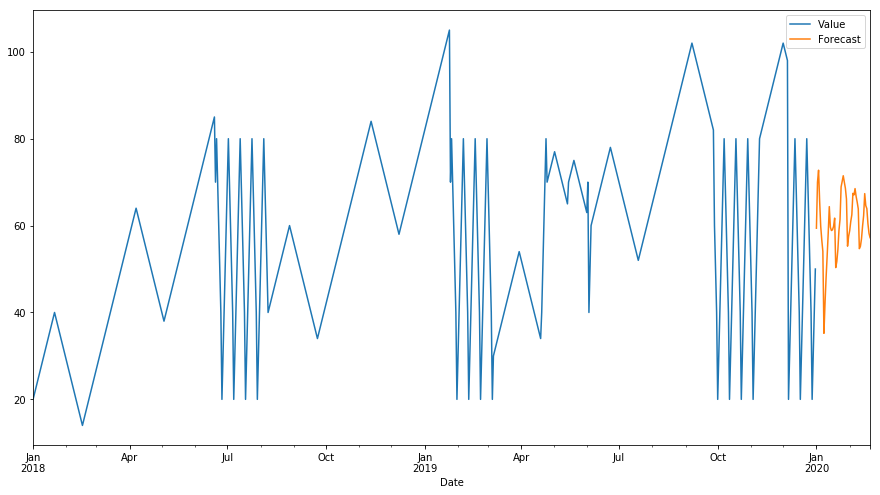

In [32]:
from statsmodels.tsa.ar_model import AR, ARResults

model = AR(df['Value'])

# Next, fit the model
ARfit = model.fit(maxlag=50,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+50, dynamic=False).rename('Forecast')

# Plot the results
df['Value'].plot(legend=True)
fcast.plot(legend=True,figsize=(15,8));

## ARIMA Model

AR (P): a regression of the variable against itself.

I (D): "integrated" - data values have been replaced with the difference between their values and the previous values

MA (Q): regression error that is a linear combination of error terms at various times in the past

A for loop is used to find the best params combination for PDQ.

In [33]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

best = []
score = []

for param in pdq:
    try:
        model = ARIMA(df['Value'],order=param)
        results = model.fit()
        best.append(param)
        score.append(results.aic)
    except:
        continue


best_params = pd.DataFrame(
{'params': best,
'scores': score})

# The lower the score the better

best_params = best_params.sort_values(by=["scores"], ascending=True)
best_params.head()

,params,scores
66,"(4, 1, 4)",4473.617869
64,"(4, 1, 2)",4510.737240
70,"(4, 2, 3)",4514.187835
36,"(2, 1, 4)",4514.405873
51,"(3, 1, 4)",4516.861550


In [34]:
best_params = best_params["params"].iloc[0]

In [35]:
model = ARIMA(df['Value'],order=best_params)
results = model.fit()


fcast = results.predict(len(df),len(df)+50,typ='levels').rename('ARIMA Forecast')

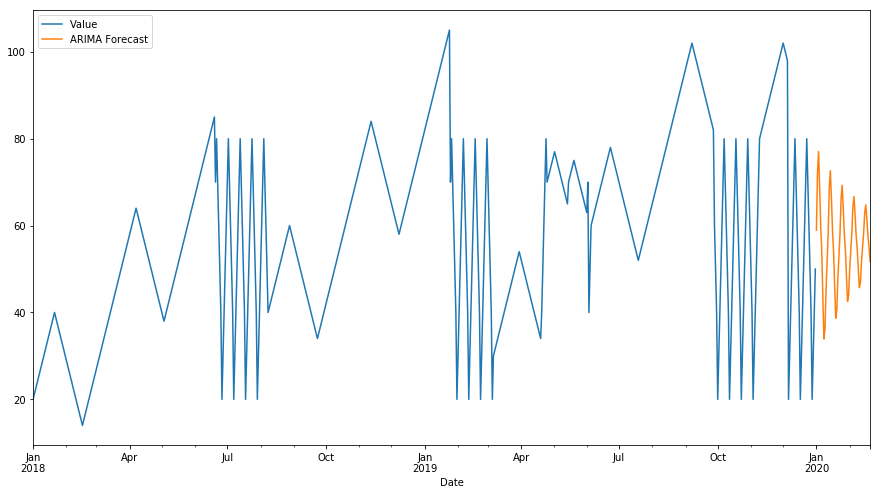

In [36]:
ax = df['Value'].plot(legend=True,figsize=(15,8))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

## SARIMAX Model

S - ARIMA - X

S: "Seasonal" adds seasonality 

X: "exogenous" allows other features to be added to the influence the forecast


In [37]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

best = []
score = []

for param in pdq:
    try:
        model = SARIMAX(df['Value'],order=param,seasonal_order=(1,0,1,15))
        results = model.fit()
        best.append(param)
        score.append(results.aic)
    except:
        continue


# Add extra features

# model = SARIMAX(df['Value'],exog=df['random_feature'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
# results = model.fit()
        
best_params = pd.DataFrame(
{'params': best,
'scores': score})

# The lower the score the better

best_params = best_params.sort_values(by=["scores"], ascending=True)
best_params.head()

,params,scores
76,"(4, 1, 4)",4475.775090
75,"(4, 1, 3)",4509.356989
40,"(2, 1, 4)",4512.305326
58,"(3, 1, 4)",4513.594638
57,"(3, 1, 3)",4516.020448


In [38]:
#Get the params with the best score
best_params = best_params["params"].iloc[0]

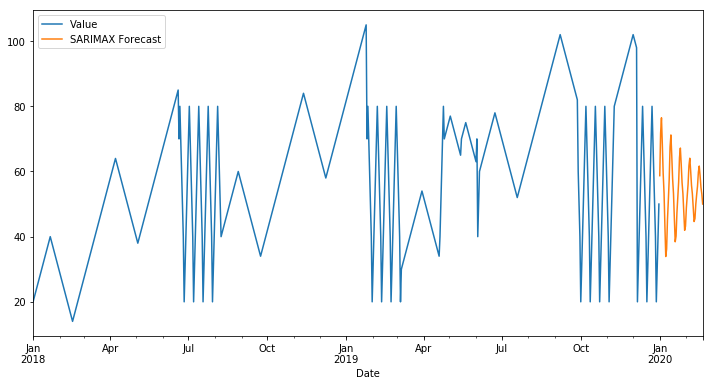

In [39]:

model = SARIMAX(df['Value'],order=best_params,seasonal_order=(1,0,1,15))
results = model.fit()

# Add extra features

# model = SARIMAX(df['Value'],exog=df['random_feature'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
# results = model.fit()


fcast = results.predict(len(df),len(df)+50,typ='levels').rename('SARIMAX Forecast')


ax = df['Value'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

## Recurrent Neural Network (RNN) Model

An artificial neural network that learns to forecast by reviewing its previous time step changes over a longer period of time.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
df = pd.read_excel("Time_Series_Data_Example.xlsx", index_col='Date', parse_dates=True)

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [42]:
# Look at the previous 50 days to predict the future 50 days
length = 50
generator = TimeseriesGenerator(scaled_df, scaled_df, length=length, batch_size=1)

In [43]:
# Only using one feature in our time series
n_features = 1

# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=0)
validation_generator = TimeseriesGenerator(scaled_df,scaled_df, length=length, batch_size=1)

# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
680/680 [==============================] - 45s 66ms/step - loss: 0.0231 - val_loss: 0.0183
Epoch 2/20
680/680 [==============================] - 42s 62ms/step - loss: 0.0133 - val_loss: 0.0107
Epoch 3/20
680/680 [==============================] - 42s 61ms/step - loss: 0.0110 - val_loss: 0.0077
Epoch 4/20
680/680 [==============================] - 42s 61ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 5/20
680/680 [==============================] - 42s 62ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 6/20
680/680 [==============================] - 43s 64ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 7/20
680/680 [==============================] - 42s 62ms/step - loss: 0.0039 - val_loss: 0.0043


In [45]:
model.save('forecasting_example.h5')

# from keras.models import load_model
# new_model = load_model('forecasting_example.h5')

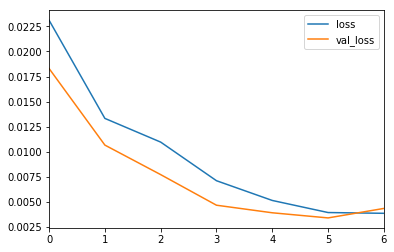

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [47]:
days_in_future = 50
predictions = []

first_eval_batch = scaled_df[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(days_in_future):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [48]:
predictions = scaler.inverse_transform(predictions)

In [49]:
# Append future dates onto existing dataframe
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,days_in_future)]
future_df = pd.DataFrame(index=future_dates, columns = df.columns)
future_df["predictions"] = predictions
final_df = pd.concat([df, future_df])

In [50]:
final_df.tail()

,Value,predictions
2020-02-14,NaN,40.425494
2020-02-15,NaN,41.136705
2020-02-16,NaN,41.207717
2020-02-17,NaN,40.693709
2020-02-18,NaN,39.787276


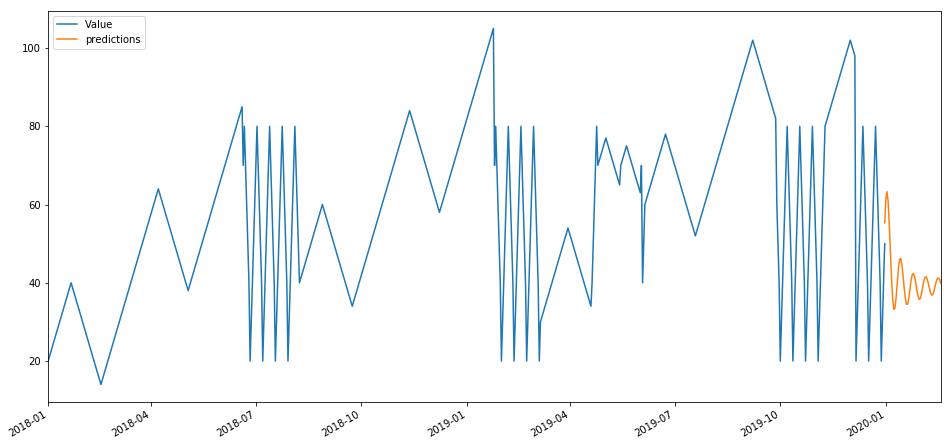

In [51]:
final_df.plot(figsize=(16,8))